 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [118]:
#All imports
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import collections

In [2]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=False, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=False, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [73]:
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
    outp = np.maximum(inp, 0)
    return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
    outp = np.where(inp >= 0, 1, 0)
    return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
    # To avoid overflow
    outp = np.exp(inp) / np.sum(np.exp(inp), axis=0)
    return outp

#Complete the below function to impliment gradient of softmax activation function
def gradSoftmax(inp):
    # To avoid overflow
    outp = (np.exp(inp) / np.sum(np.exp(inp), axis=0)) * (1 - np.exp(inp) / np.sum(np.exp(inp), axis=0))
    return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
    #Inputs: input data, paramters of network
    W1, W2, W3 = weights

    a1 = inputs@W1
    z1 = ReLu(a1)

    a2 = z1@W2
    z2 = ReLu(a2)

    a3 = z2@W3
    y = softmax(a3)

    outps = [a1, z1, a2, z2, a3, y]

    #Return the required outputs, i.e., final output and intermediate activations
    return outps

def computeGradients(inputs, targets, weights, activations):
    #Inputs: input data, targets, parameters of netwrok, intermediate activations
    a1, z1, a2, z2, a3, y = activations
    W1, W2, W3 = weights

    del3 = 2*(y - targets)/len(targets) * gradSoftmax(a3)
    dj_dw3 = z2.T @ del3

    del2 = (del3 @ W3.T) * gradReLu(a2)
    dj_dw2 = z1.T @ del2

    del3 = (del2 @ W2.T) * gradReLu(a1)
    dj_dw1 = inputs.T @ del3

    #Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    #Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    # print(np.unique(dj_dw1))

    W1 = W1 - learning_rate * dj_dw1
    W2 = W2 - learning_rate * dj_dw2
    W3 = W3 - learning_rate * dj_dw3

    #Return the updated parameters
    return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
    #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

    #Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations)

    # print(np.max(gradients[0]), np.min(gradients[0]))
    # print(np.max(gradients[1]), np.min(gradients[1]))
    # print(np.max(gradients[2]), np.min(gradients[2]))

    #Update the paramters using gradients
    weights = applyGradients(weights, gradients, learning_rate)

    #Return the updated parameters
    return weights


In [8]:
from tqdm import tqdm

In [4]:
##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):

    # Normalize the inputs
    inputs = inputs / 255
    
    #Convert the targets to one-hot encoding
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    #Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    #Split the training data into two parts.
    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]


    #Randomly initialize the weights
    # W1 = np.random.randn(inputs.shape[1], hidden_units)
    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    # W2 = np.random.randn(hidden_units, hidden_units)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    # W3 = np.random.randn(hidden_units, n_classes)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    prev_acc = 0

    final_weights = []

    #Interate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        #Interate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data

            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            #Forward propagation
            activations = fwdPropagate(batch_data, weights)

            #Backward propagation
            weights = backPropagate(batch_data, batch_targets, weights, activations, learning_rate)

        #Compute outpus on trianing data
        preds = fwdPropagate(train_data, weights)[-1]
        # print(np.argmax(preds, axis=1))
        # print(weights)
        # print(np.unique(weights[0]))
        # print(np.unique(weights[1]))
        # print(np.unique(weights[2]))

        #Compute training accuracy, and training error
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        #Compute outputs on validation data
        val_preds = fwdPropagate(val_data, weights)[-1]

        #Compute validation accuracy, and validation error
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print("Epoch: ", epoch, "Training Error: ", 1-train_acc, "Training Accuracy: ", train_acc, "Validation Error: ", 1-val_acc, "Validation Accuracy: ", val_acc)

        #Save the parameters of network
        if prev_acc < val_acc:
            final_weights = weights
            prev_acc = val_acc
    return final_weights

In [7]:
#Call the training function to train the network

fwts = training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, batch_size = 32, epochs=50, train_val_split=0.9, learning_rate=0.001)

Epoch:  0 Training Error:  0.9217222222222222 Training Accuracy:  0.07827777777777778 Validation Error:  0.9225 Validation Accuracy:  0.0775
Epoch:  1 Training Error:  0.9102962962962963 Training Accuracy:  0.0897037037037037 Validation Error:  0.9098333333333333 Validation Accuracy:  0.09016666666666667
Epoch:  2 Training Error:  0.8978703703703703 Training Accuracy:  0.10212962962962963 Validation Error:  0.8976666666666666 Validation Accuracy:  0.10233333333333333
Epoch:  3 Training Error:  0.8837962962962963 Training Accuracy:  0.1162037037037037 Validation Error:  0.8853333333333333 Validation Accuracy:  0.11466666666666667
Epoch:  4 Training Error:  0.8692222222222222 Training Accuracy:  0.13077777777777777 Validation Error:  0.8713333333333333 Validation Accuracy:  0.12866666666666668
Epoch:  5 Training Error:  0.8523518518518518 Training Accuracy:  0.14764814814814814 Validation Error:  0.854 Validation Accuracy:  0.146
Epoch:  6 Training Error:  0.8366481481481481 Training Acc

In [74]:
##################################################
#Evaluate the performance on test data
##################################################

def test(inputs, targets_idx, weights):
    #Normalize the inputs
    inputs = inputs / 255

    #Convert the targets to one-hot encoding
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    #Forward propagate the data
    preds = fwdPropagate(inputs, weights)[-1]

    #Compute the accuracy of the model
    accuracy = np.mean(np.argmax(preds, axis=1) == np.argmax(targets, axis=1))

    #Return the accuracy
    return accuracy

def confusion_matrix(inputs, targets_idx, weights):
    #Normalize the inputs
    inputs = inputs / 255

    #Convert the targets to one-hot encoding
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    #Forward propagate the data
    preds = fwdPropagate(inputs, weights)[-1]

    #Compute the confusion matrix
    confusion_matrix = np.zeros((10,10))
    for i in range(targets_idx.size):
        confusion_matrix[np.argmax(targets[i]), np.argmax(preds[i])] += 1

    #Return the confusion matrix
    return confusion_matrix.astype(int)

In [12]:
acc = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, fwts)
print("Test Accuracy: ", acc)
c_mat = confusion_matrix(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, fwts)
print("Confusion Matrix: ")
print(c_mat)

Test Accuracy:  0.5792
Confusion Matrix: 
[[ 885   13    8   16    0   14   40    2    1    1]
 [   0 1122    1    2    0    0    3    1    5    1]
 [  63  157  359  195   26    4   98   29   43   58]
 [  81  187   45  552    4   53   27   21   28   12]
 [  18  111    8    1  509    1   64   80    4  186]
 [ 142  193   20  237   20  167   44   13   44   12]
 [  61   77    3   18   12    6  775    4    1    1]
 [  44  147    4    4   32    6    6  646   17  122]
 [  57  199   17  186   11   22   29   20  288  145]
 [  42   86    3   11   86    2   35  221   34  489]]


<b> Report your observations </b>

1. Similar looking digits are often misclassified. For example, 4 and 9, 2 and 7 etc.

2. The error decreases for certain epochs and then saturates/increases. 

3. The model is not overfitting since it has only 3 layers and the dataset is large enough.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [79]:
##################################################
#Train the network with different activation functions
##################################################

def sigmoid(inp):
    outp = 1 / (1 + np.exp(-inp))
    return outp

def gradSigmoid(inp):
    outp = sigmoid(inp) * (1 - sigmoid(inp))
    return outp

def tanh(inp):
    outp = np.tanh(inp)
    return outp

def gradTanh(inp):
    outp = 1 - np.tanh(inp)**2
    return outp

def leakyReLu(inp):
    outp = np.maximum(inp, 0.01*inp)
    return outp

def gradLeakyReLu(inp):
    outp = np.where(inp >= 0, 1, 0.01)
    return outp

def ReLu(inp):
    outp = np.maximum(inp, 0)
    return outp

def gradReLu(inp):
    outp = np.where(inp >= 0, 1, 0)
    return outp

def softmax(inp):
    outp = np.exp(inp) / np.sum(np.exp(inp), axis=0)
    return outp

def gradSoftmax(inp):
    outp = (np.exp(inp) / np.sum(np.exp(inp), axis=0)) * (1 - np.exp(inp) / np.sum(np.exp(inp), axis=0))
    return outp


def fwdPropagate(inputs, weights, activation):
    W1, W2, W3 = weights

    a1 = inputs@W1
    if activation == 'relu':
        z1 = ReLu(a1)
    elif activation == 'sigmoid':
        z1 = sigmoid(a1)
    elif activation == 'tanh':
        z1 = tanh(a1)
    elif activation == 'leakyrelu':
        z1 = leakyReLu(a1)

    a2 = z1@W2
    if activation == 'relu':
        z2 = ReLu(a2)
    elif activation == 'sigmoid':
        z2 = sigmoid(a2)
    elif activation == 'tanh':
        z2 = tanh(a2)
    elif activation == 'leakyrelu':
        z2 = leakyReLu(a2)

    a3 = z2@W3
    y = softmax(a3)

    outps = [a1, z1, a2, z2, a3, y]

    return outps

def computeGradients(inputs, targets, weights, activations, activation):
    a1, z1, a2, z2, a3, y = activations
    W1, W2, W3 = weights

    del3 = 2*(y - targets)/len(targets) * gradSoftmax(a3)
    dj_dw3 = z2.T @ del3

    if activation == 'relu':
        del2 = (del3 @ W3.T) * gradReLu(a2)
    elif activation == 'sigmoid':
        del2 = (del3 @ W3.T) * gradSigmoid(a2)
    elif activation == 'tanh':
        del2 = (del3 @ W3.T) * gradTanh(a2)
    elif activation == 'leakyrelu':
        del2 = (del3 @ W3.T) * gradLeakyReLu(a2)
    dj_dw2 = z1.T @ del2

    if activation == 'relu':
        del3 = (del2 @ W2.T) * gradReLu(a1)
    elif activation == 'sigmoid':
        del3 = (del2 @ W2.T) * gradSigmoid(a1)
    elif activation == 'tanh':
        del3 = (del2 @ W2.T) * gradTanh(a1)
    elif activation == 'leakyrelu':
        del3 = (del2 @ W2.T) * gradLeakyReLu(a1)
    dj_dw1 = inputs.T @ del3

    return [dj_dw1, dj_dw2, dj_dw3]

def backPropagate(inputs, targets, weights, activations, learning_rate, activation):
    gradients = computeGradients(inputs, targets, weights, activations, activation)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights

In [7]:
# Train the network with different activation functions
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, activation='relu'):

    inputs = inputs / 255
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]

    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    prev_acc = 0

    final_weights = []

    for epoch in range(epochs):
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            activations = fwdPropagate(batch_data, weights, activation)
            weights = backPropagate(batch_data, batch_targets, weights, activations, learning_rate, activation)

        preds = fwdPropagate(train_data, weights, activation)[-1]
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        val_preds = fwdPropagate(val_data, weights, activation)[-1]
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))

        print("Epoch: ", epoch, "Training Error: ", 1-train_acc, "Training Accuracy: ", train_acc, "Validation Error: ", 1-val_acc, "Validation Accuracy: ", val_acc)

        if prev_acc < val_acc:
            final_weights = weights
            prev_acc = val_acc
        
    return final_weights

In [ ]:
weights_relu = training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.002, activation='relu')

In [ ]:
weights_sigmoid = training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.002, activation='sigmoid')

In [ ]:
weights_tanh = training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.002, activation='tanh')

In [ ]:
weights_leakyrelu = training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.002, activation='leakyrelu')

In [85]:
def test(inputs, targets_idx, weights, activation):
    #Normalize the inputs
    inputs = inputs / 255

    #Convert the targets to one-hot encoding
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    #Forward propagate the data
    preds = fwdPropagate(inputs, weights, activation)[-1]

    #Compute the accuracy of the model
    accuracy = np.mean(np.argmax(preds, axis=1) == np.argmax(targets, axis=1))

    #Return the accuracy
    return accuracy

In [ ]:
##################################################
#Evaluate the performance on MNIST test data
##################################################

acc_relu = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_relu, 'relu')
print("Test Accuracy with ReLU: ", acc_relu)

acc_sigmoid = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_sigmoid, 'sigmoid')
print("Test Accuracy with Sigmoid: ", acc_sigmoid)

acc_tanh = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_tanh, 'tanh')
print("Test Accuracy with Tanh: ", acc_tanh)

acc_leakyrelu = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_leakyrelu, 'leakyrelu')
print("Test Accuracy with Leaky ReLU: ", acc_leakyrelu)

In [ ]:
##################################################
#Train the network with different activation functions
##################################################







##################################################
#Evaluate the performance on MNIST test data
##################################################










<b> Report your observations </b>

1. The model with LeakyReLU and Relu activation function performs similar and better than the other activation functions.

2. Different learning rates are required for different activation functions.

3. Sigmod activation function is not able to learn the MNIST dataset well.

4. LeakyReLU performed the best among all the activation functions.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [9]:
##################################################
#Train the network using Adam optimizer
##################################################

def applyGradientsAdam(weights, gradients, learning_rate, beta1, beta2, epsilon, m, v, t):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    m[0] = beta1 * m[0] + (1 - beta1) * dj_dw1
    v[0] = beta2 * v[0] + (1 - beta2) * (dj_dw1**2)
    m_hat = m[0] / (1 - beta1**t)
    v_hat = v[0] / (1 - beta2**t)
    W1 = W1 - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    m[1] = beta1 * m[1] + (1 - beta1) * dj_dw2
    v[1] = beta2 * v[1] + (1 - beta2) * (dj_dw2**2)
    m_hat = m[1] / (1 - beta1**t)
    v_hat = v[1] / (1 - beta2**t)
    W2 = W2 - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    m[2] = beta1 * m[2] + (1 - beta1) * dj_dw3
    v[2] = beta2 * v[2] + (1 - beta2) * (dj_dw3**2)
    m_hat = m[2] / (1 - beta1**t)
    v_hat = v[2] / (1 - beta2**t)
    W3 = W3 - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return [W1, W2, W3]

def backPropagateAdam(inputs, targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, activation):
    gradients = computeGradients(inputs, targets, weights, activations, activation)
    weights = applyGradientsAdam(weights, gradients, learning_rate, beta1, beta2, epsilon, m, v, t)
    return weights

def trainingAdam(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, beta1=0.8, beta2=0.999, epsilon=1e-6, activation='relu'):

    inputs = inputs / 255
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]

    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 1

    prev_acc = 0

    final_weights = []

    for epoch in range(epochs):
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            activations = fwdPropagate(batch_data, weights, activation)
            weights = backPropagateAdam(batch_data, batch_targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, activation)
            t += 1

        preds = fwdPropagate(train_data, weights, activation)[-1]
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        val_preds = fwdPropagate(val_data, weights, activation)[-1]
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))
        
        print("Epoch: ", epoch, "Training Error: ", 1-train_acc, "Training Accuracy: ", train_acc, "Validation Error: ", 1-val_acc, "Validation Accuracy: ", val_acc)

        if prev_acc < val_acc:
            final_weights = weights
            prev_acc = val_acc

    return final_weights

In [52]:
# Using Leaky ReLU activation function
weights_adam = trainingAdam(mnist_traindata.reshape(-1, 28*28)[0:1000], mnist_trainlabel[0:1000], batch_size = 8, epochs=10, train_val_split=0.9, learning_rate=0.0000002, beta1=0.8, beta2=0.999, epsilon=1e-6, activation='leakyrelu')

Epoch:  0 Training Error:  0.7733333333333333 Training Accuracy:  0.22666666666666666 Validation Error:  0.87 Validation Accuracy:  0.13
Epoch:  1 Training Error:  0.6177777777777778 Training Accuracy:  0.38222222222222224 Validation Error:  0.79 Validation Accuracy:  0.21
Epoch:  2 Training Error:  0.4722222222222222 Training Accuracy:  0.5277777777777778 Validation Error:  0.61 Validation Accuracy:  0.39
Epoch:  3 Training Error:  0.37222222222222223 Training Accuracy:  0.6277777777777778 Validation Error:  0.5 Validation Accuracy:  0.5
Epoch:  4 Training Error:  0.31000000000000005 Training Accuracy:  0.69 Validation Error:  0.43999999999999995 Validation Accuracy:  0.56
Epoch:  5 Training Error:  0.27555555555555555 Training Accuracy:  0.7244444444444444 Validation Error:  0.39 Validation Accuracy:  0.61
Epoch:  6 Training Error:  0.25111111111111106 Training Accuracy:  0.7488888888888889 Validation Error:  0.36 Validation Accuracy:  0.64
Epoch:  7 Training Error:  0.23333333333333

In [53]:
##################################################
#Compare the accuracies and report your observations
##################################################

acc_adam = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_adam, 'leakyrelu')
print("Test Accuracy with Adam Optimizer: ", acc_adam)

Test Accuracy with Adam Optimizer:  0.7044


<b> Report your observations </b>

1. Adam optimization algorithm takes longer time for each epoch compared to SGD.

2. Adam optimization algorithm performs better than SGD for the MNIST dataset.

3. Learning rate used for Adam optimization algorithm is much smaller than the learning rate used for SGD.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [10]:
##################################################
#Training with weight regularization
##################################################

def applyGradientsRegularization(weights, gradients, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2):

    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    m[0] = beta1 * m[0] + (1 - beta1) * dj_dw1
    v[0] = beta2 * v[0] + (1 - beta2) * (dj_dw1**2)
    m_hat = m[0] / (1 - beta1**t)
    v_hat = v[0] / (1 - beta2**t)
    W1 = W1 - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon) + lambda1 * W1 + lambda2 * np.sign(W1))

    m[1] = beta1 * m[1] + (1 - beta1) * dj_dw2
    v[1] = beta2 * v[1] + (1 - beta2) * (dj_dw2**2)
    m_hat = m[1] / (1 - beta1**t)
    v_hat = v[1] / (1 - beta2**t)
    W2 = W2 - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon) + lambda1 * W2 + lambda2 * np.sign(W2))

    m[2] = beta1 * m[2] + (1 - beta1) * dj_dw3
    v[2] = beta2 * v[2] + (1 - beta2) * (dj_dw3**2)
    m_hat = m[2] / (1 - beta1**t)
    v_hat = v[2] / (1 - beta2**t)
    W3 = W3 - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon) + lambda1 * W3 + lambda2 * np.sign(W3))

    return [W1, W2, W3]

def backPropagateRegularization(inputs, targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2, activation):
    gradients = computeGradients(inputs, targets, weights, activations, activation)
    weights = applyGradientsRegularization(weights, gradients, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2)
    return weights

def trainingRegularization(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='relu'):
    inputs = inputs / 255
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]

    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 1

    prev_acc = 0

    final_weights = []

    for epoch in range(epochs):
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            activations = fwdPropagate(batch_data, weights, activation)
            weights = backPropagateRegularization(batch_data, batch_targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2, activation)
            t += 1

        preds = fwdPropagate(train_data, weights, activation)[-1]
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        val_preds = fwdPropagate(val_data, weights, activation)[-1]
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))

        print("Epoch: ", epoch, "Training Error: ", 1-train_acc, "Training Accuracy: ", train_acc, "Validation Error: ", 1-val_acc, "Validation Accuracy: ", val_acc)

        if prev_acc < val_acc:
            final_weights = weights
            prev_acc = val_acc

    return final_weights

In [56]:
weights_regularization = trainingRegularization(mnist_traindata.reshape(-1, 28*28)[:1000], mnist_trainlabel[:1000], batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.0000002, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='leakyrelu')

Epoch:  0 Training Error:  0.7933333333333333 Training Accuracy:  0.20666666666666667 Validation Error:  0.85 Validation Accuracy:  0.15
Epoch:  1 Training Error:  0.6444444444444444 Training Accuracy:  0.35555555555555557 Validation Error:  0.71 Validation Accuracy:  0.29
Epoch:  2 Training Error:  0.4833333333333333 Training Accuracy:  0.5166666666666667 Validation Error:  0.5700000000000001 Validation Accuracy:  0.43
Epoch:  3 Training Error:  0.3933333333333333 Training Accuracy:  0.6066666666666667 Validation Error:  0.47 Validation Accuracy:  0.53
Epoch:  4 Training Error:  0.34111111111111114 Training Accuracy:  0.6588888888888889 Validation Error:  0.42000000000000004 Validation Accuracy:  0.58
Epoch:  5 Training Error:  0.30666666666666664 Training Accuracy:  0.6933333333333334 Validation Error:  0.36 Validation Accuracy:  0.64
Epoch:  6 Training Error:  0.2844444444444445 Training Accuracy:  0.7155555555555555 Validation Error:  0.30000000000000004 Validation Accuracy:  0.7
E

In [57]:
acc_regularization = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_regularization, 'leakyrelu')
print("Test Accuracy with Regularization: ", acc_regularization)

Test Accuracy with Regularization:  0.7021


In [11]:
##################################################
#Training with dropout strategy
##################################################

# Evaluate the network output for different dropouts & combine them
# Use expected neuronal activation zj pj to infer the network output

def fwdPropagateDropout(inputs, weights, activation, bernoulli_param):
    W1, W2, W3 = weights

    a1 = inputs@W1
    if activation == 'relu':
        z1 = ReLu(a1)
    elif activation == 'sigmoid':
        z1 = sigmoid(a1)
    elif activation == 'tanh':
        z1 = tanh(a1)
    elif activation == 'leakyrelu':
        z1 = leakyReLu(a1)

    mask1 = np.random.binomial(1, bernoulli_param, z1.shape)
    z1 = z1 * mask1

    a2 = z1@W2
    if activation == 'relu':
        z2 = ReLu(a2)
    elif activation == 'sigmoid':
        z2 = sigmoid(a2)
    elif activation == 'tanh':
        z2 = tanh(a2)
    elif activation == 'leakyrelu':
        z2 = leakyReLu(a2)

    mask2 = np.random.binomial(1, bernoulli_param, z2.shape)
    z2 = z2 * mask2

    a3 = z2@W3
    y = softmax(a3)

    outps = [a1, z1, a2, z2, a3, y]

    return outps

def backPropagateDropout(inputs, targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2, activation, bernoulli_param):
    gradients = computeGradients(inputs, targets, weights, activations, activation)
    weights = applyGradientsRegularization(weights, gradients, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2)
    return weights


def trainingDropout(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='relu', bernoulli_param=0.5):
    inputs = inputs / 255
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]

    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 1

    prev_acc = 0

    final_weights = []

    for epoch in range(epochs):
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            activations = fwdPropagateDropout(batch_data, weights, activation, bernoulli_param)
            weights = backPropagateDropout(batch_data, batch_targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2, activation, bernoulli_param)
            t += 1

        preds = fwdPropagate(train_data, weights, activation)[-1]
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        val_preds = fwdPropagate(val_data, weights, activation)[-1]
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))

        print("Epoch: ", epoch, "Training Error: ", 1-train_acc, "Training Accuracy: ", train_acc, "Validation Error: ", 1-val_acc, "Validation Accuracy: ", val_acc)

        if prev_acc < val_acc:
            final_weights = weights
            prev_acc = val_acc

    return final_weights

In [12]:
weights_dropout = trainingDropout(mnist_traindata.reshape(-1, 28*28)[:1000], mnist_trainlabel[:1000], batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.0000002, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='leakyrelu', bernoulli_param=0.5)

Epoch:  0 Training Error:  0.8211111111111111 Training Accuracy:  0.17888888888888888 Validation Error:  0.84 Validation Accuracy:  0.16
Epoch:  1 Training Error:  0.7155555555555555 Training Accuracy:  0.28444444444444444 Validation Error:  0.78 Validation Accuracy:  0.22
Epoch:  2 Training Error:  0.62 Training Accuracy:  0.38 Validation Error:  0.69 Validation Accuracy:  0.31
Epoch:  3 Training Error:  0.52 Training Accuracy:  0.48 Validation Error:  0.5900000000000001 Validation Accuracy:  0.41
Epoch:  4 Training Error:  0.44777777777777783 Training Accuracy:  0.5522222222222222 Validation Error:  0.52 Validation Accuracy:  0.48
Epoch:  5 Training Error:  0.4033333333333333 Training Accuracy:  0.5966666666666667 Validation Error:  0.5 Validation Accuracy:  0.5
Epoch:  6 Training Error:  0.3555555555555555 Training Accuracy:  0.6444444444444445 Validation Error:  0.48 Validation Accuracy:  0.52
Epoch:  7 Training Error:  0.3244444444444444 Training Accuracy:  0.6755555555555556 Vali

In [13]:
acc_dropout = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_dropout, 'leakyrelu')
print("Test Accuracy with Dropout: ", acc_dropout)

Test Accuracy with Dropout:  0.6882


In [17]:
##################################################
#Training with early stopping criterion
##################################################

def trainingEarlyStopping(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='relu', bernoulli_param=0.5, patience=5):
    inputs = inputs / 255
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]

    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 1

    prev_acc = 0

    final_weights = []

    for epoch in range(epochs):
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            activations = fwdPropagateDropout(batch_data, weights, activation, bernoulli_param)
            weights = backPropagateDropout(batch_data, batch_targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2, activation, bernoulli_param)
            t += 1

        preds = fwdPropagate(train_data, weights, activation)[-1]
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        val_preds = fwdPropagate(val_data, weights, activation)[-1]
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))

        print("Epoch: ", epoch, "Training Error: ", 1-train_acc, "Training Accuracy: ", train_acc, "Validation Error: ", 1-val_acc, "Validation Accuracy: ", val_acc)

        if prev_acc <= val_acc:
            final_weights = weights
            prev_acc = val_acc
        else:
            break

    return final_weights

In [18]:
weights_earlystopping = trainingEarlyStopping(mnist_traindata.reshape(-1, 28*28)[:1000], mnist_trainlabel[:1000], batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.0000002, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='leakyrelu', bernoulli_param=0.5)

Epoch:  0 Training Error:  0.8333333333333334 Training Accuracy:  0.16666666666666666 Validation Error:  0.81 Validation Accuracy:  0.19
Epoch:  1 Training Error:  0.6966666666666667 Training Accuracy:  0.30333333333333334 Validation Error:  0.71 Validation Accuracy:  0.29
Epoch:  2 Training Error:  0.5944444444444444 Training Accuracy:  0.40555555555555556 Validation Error:  0.62 Validation Accuracy:  0.38
Epoch:  3 Training Error:  0.5 Training Accuracy:  0.5 Validation Error:  0.54 Validation Accuracy:  0.46
Epoch:  4 Training Error:  0.43000000000000005 Training Accuracy:  0.57 Validation Error:  0.43999999999999995 Validation Accuracy:  0.56
Epoch:  5 Training Error:  0.3833333333333333 Training Accuracy:  0.6166666666666667 Validation Error:  0.43000000000000005 Validation Accuracy:  0.57
Epoch:  6 Training Error:  0.3488888888888889 Training Accuracy:  0.6511111111111111 Validation Error:  0.38 Validation Accuracy:  0.62
Epoch:  7 Training Error:  0.32666666666666666 Training Ac

In [19]:
acc_earlystopping = test(mnist_testdata.reshape(-1, 28*28), mnist_testlabel, weights_earlystopping, 'leakyrelu')
print("Test Accuracy with Early Stopping: ", acc_earlystopping)

Test Accuracy with Early Stopping:  0.694


<b> Report your observations </b>

1. Weight regularization helps in reducing the overfitting problem.

2. Dropout with a probability of 0.5 is able to provide better results.

3. Early stopping is able to stop the network training when the validation error starts to decrease. This results in faster training of network



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



In [119]:
def Logistic_Regression(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Predictions on test data

    max_iter = 20  #max number of ierations for parameter update
    threshold = 0.5 #threshold for classification
    X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1) #Data. Append ones to the training data to take care of the bias
    X_t = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1) #Data. Append ones to the testing data to take care of the bias
    w = np.random.rand(X.shape[1]) #Initialize the weight vector
    for iter in range(0,max_iter,1):
        preds = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if abs(X[i]@w) < 30:
                preds[i] = 1 / (1 + math.exp(-X[i] @ w))
            elif X[i]@w > 30:
                preds[i] = 1
            else:
                preds[i] = 0
        error = preds - Y_train #Difference between preds and Y_train

        #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate

        grad = X.T @ error
        H = X.T @ np.diag(preds * (1 - preds)) @ X

        #Update the weight vector

        w = w - np.linalg.pinv(H) @ grad

    #Test data predictions

    test_preds = np.zeros(X_t.shape[0])
    for i in range(X_t.shape[0]):
        if abs(X_t[i]@w) < 30:
            test_preds[i] = 1 / (1 + math.exp(-X_t[i] @ w))
        elif X_t[i]@w > 30:
            test_preds[i] = 1
        else:
            test_preds[i] = 0

    #Compare the predictions with 0, to output the decision

    test_preds = (test_preds > threshold).astype(int)

    #Return the predicted test labels
    return test_preds

def LR_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth and predicted lables of test data
    #Outputs: Accuracy

    acc = np.mean(Y_test == Y_pred)

    #Compute and return the accuracy
    return acc


In [76]:
##################################################
#Training with early stopping criterion
##################################################

def trainingNN(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='relu', bernoulli_param=0.5, patience=5):
    inputs = inputs / 255
    targets = np.zeros((targets_idx.size, targets_idx.max()+1))
    targets[np.arange(targets_idx.size), targets_idx] = 1

    hidden_units = 512
    n_classes = targets_idx.max()+1
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    train_data = inputs[:int(train_val_split*n_samples)]
    train_targets = targets[:int(train_val_split*n_samples)]
    val_data = inputs[int(train_val_split*n_samples):]
    val_targets = targets[int(train_val_split*n_samples):]

    W1 = (np.random.uniform(-1.,1.,size=(inputs.shape[1],hidden_units))/np.sqrt(inputs.shape[1]*hidden_units)).astype(np.float32)
    W2 = (np.random.uniform(-1.,1.,size=(hidden_units,hidden_units))/np.sqrt(hidden_units*hidden_units)).astype(np.float32)
    W3 = (np.random.uniform(-1.,1.,size=(hidden_units,n_classes))/np.sqrt(hidden_units*n_classes)).astype(np.float32)
    weights = [W1, W2, W3]

    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 1

    prev_acc = 0

    final_weights = []

    for epoch in range(epochs):
        idx = np.random.permutation(train_data.shape[0])
        train_data = train_data[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            batch_data = train_data[batch*batch_size:(batch+1)*batch_size]
            batch_targets = train_targets[batch*batch_size:(batch+1)*batch_size]

            activations = fwdPropagate(batch_data, weights, activation)
            weights = backPropagateRegularization(batch_data, batch_targets, weights, activations, learning_rate, beta1, beta2, epsilon, m, v, t, lambda1, lambda2, activation)
            t += 1

        preds = fwdPropagate(train_data, weights, activation)[-1]
        train_acc = np.mean(np.argmax(preds, axis=1) == np.argmax(train_targets, axis=1))

        val_preds = fwdPropagate(val_data, weights, activation)[-1]
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(val_targets, axis=1))

        if prev_acc <= val_acc:
            final_weights = weights
            prev_acc = val_acc
        else:
            break

    return final_weights

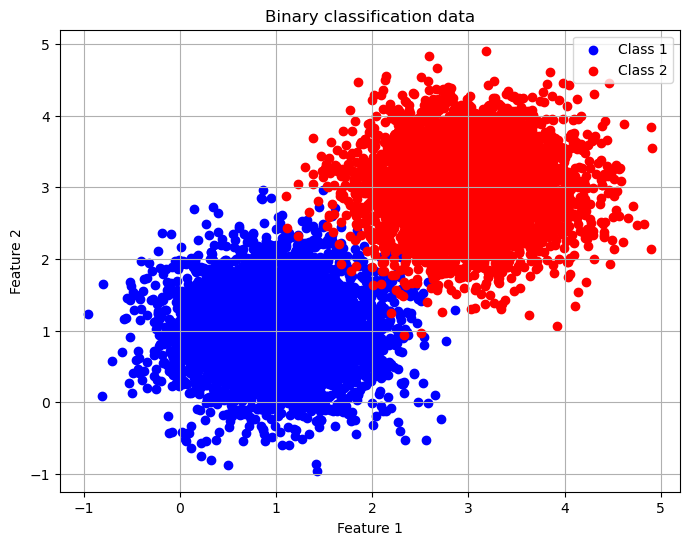

In [123]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))]).astype(int)

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))]).astype(int)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


In [124]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

preds_LR = Logistic_Regression(tr_data, tr_targets, te_data)

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

# weights_NN = trainingNN(tr_data, tr_targets, batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.0000002, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='leakyrelu', bernoulli_param=0.5)

##################################################
#Compare the performance of both the models on linearly separable data
##################################################

acc_LR = LR_Accuracy(te_targets, preds_LR)
# acc_NN = test(te_data, te_targets, weights_NN, 'leakyrelu')

print("Accuracy of Logistic Regression: ", acc_LR)
# print("Accuracy of Neural Network: ", acc_NN)

Accuracy of Logistic Regression:  0.991


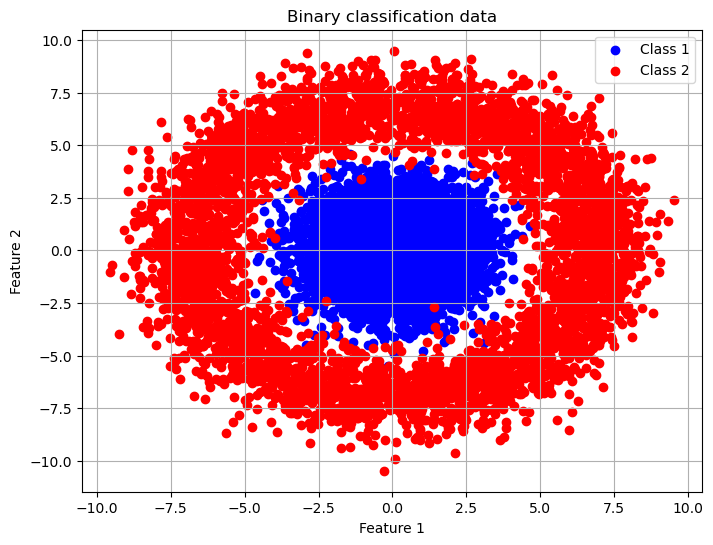

In [90]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 5000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(int(n_samples*0.9), radius1,radius2,noise_std)

tr_data = np.concatenate([class1_data, class2_data], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))]).astype(int)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

class1_data, class2_data = generate_concentric_data(int(n_samples*0.1), radius1,radius2,noise_std)

te_data = np.concatenate([class1_data, class2_data], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))]).astype(int)

In [91]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

preds_LR = Logistic_Regression(tr_data, tr_targets, te_data)

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

weights_NN = trainingNN(tr_data, tr_targets, batch_size = 10, epochs=20, train_val_split=0.9, learning_rate=0.0000002, beta1=0.8, beta2=0.999, epsilon=1e-6, lambda1=0.01, lambda2=0.01, activation='leakyrelu', bernoulli_param=0.5)

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################

acc_LR = LR_Accuracy(te_targets, preds_LR)
acc_NN = test(te_data, te_targets, weights_NN, 'leakyrelu')

print("Accuracy of Logistic Regression: ", acc_LR)
print("Accuracy of Neural Network: ", acc_NN)

Accuracy of Logistic Regression:  0.556
Accuracy of Neural Network:  0.921


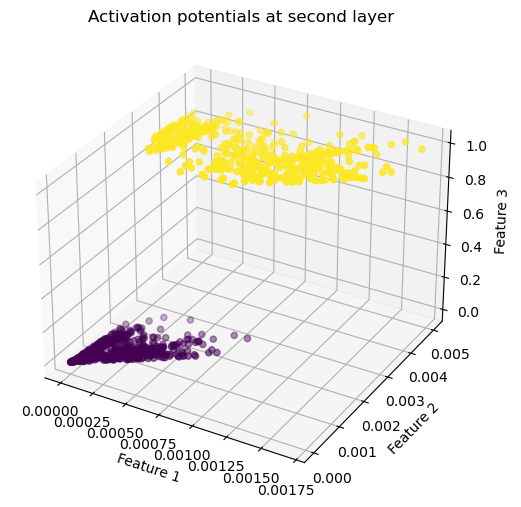

In [110]:
# Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer.
# Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space.
activations = fwdPropagate(te_data, weights_NN, 'leakyrelu')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(activations[4][:,0], activations[4][:,1], te_targets, c=te_targets)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Activation potentials at second layer')
plt.show()

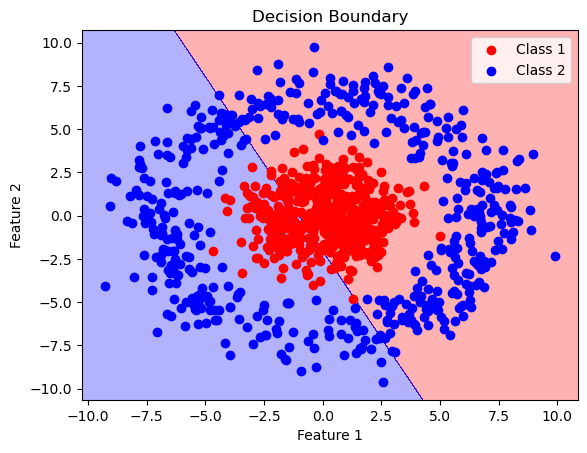

In [114]:
# Logistic Regression decision boundary

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = Logistic_Regression(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_data[:,0], class1_data[:,1], color='r', label='Class 1')
plt.scatter(class2_data[:,0], class2_data[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

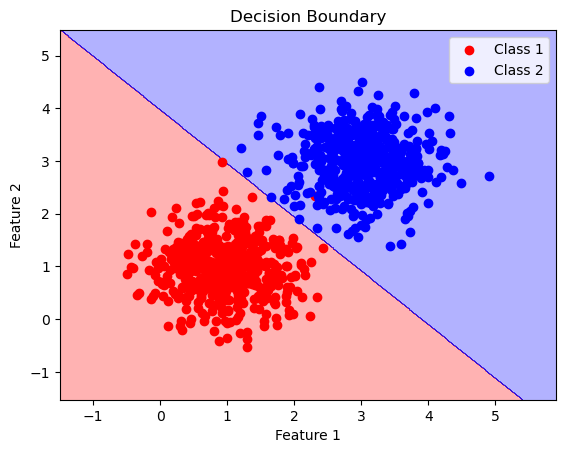

In [120]:
# Logistic Regression decision boundary

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = Logistic_Regression(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<b> Report your observations </b>

1. On linearly separable data, both logistic regression and deep neural network based classification models are able to classify the data well.

2. On non-linearly separable data, deep neural network based classification models are able to classify the data well while logistic regression is able to achieve only around 50% accuracy.

3. Deep neural network based classification models are able to learn the non-linearly separable data well by mapping the data into higher dimension where it becomes linearly separable.

